# About the Project

**About:** Uber has been a major source of travel for people living in urban areas. Some people don’t have their vehicles while some don’t drive their vehicles intentionally because of their busy schedule. So different kinds of people are using the services of Uber and other taxi services.




# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

# Reading the csv

In [ ]:
data = pd.read_csv("My Uber Drives - 2016.csv")
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Checking for Missing Values

In [ ]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [ ]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

# Knowing the data

In [ ]:
data.describe()

,MILES*,Hour,Day,Day of week,Month
count,653.000000,653.00000,653.000000,653.000000,653.000000
mean,11.196325,14.82389,15.719755,3.027565,6.416539
std,22.986429,4.81733,8.840242,1.951680,3.973976
min,0.500000,0.00000,1.000000,0.000000,1.000000
25%,3.200000,12.00000,8.000000,1.000000,3.000000
50%,6.400000,15.00000,16.000000,3.000000,6.000000
75%,10.400000,18.00000,23.000000,5.000000,11.000000
max,310.300000,23.00000,31.000000,6.000000,12.000000


In [ ]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [ ]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [ ]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [ ]:
hr = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
  hr.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[dayofweek[-1]])

data['Hour'] = hr
data['Day'] = day
data['Day of week'] = dayofweek
data['Month'] = month
data['Weekday'] = weekday

In [ ]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Day of week,Month,Weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


# Calculating Travelling Time

In [ ]:
time = []
data['TRAVELLING_TIME'] = data['END_DATE*'] - data['START_DATE*']
for i in data['TRAVELLING_TIME']:
    time.append(i.seconds/60)
data['TRAVELLING_TIME'] = time
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Day of week,Month,Weekday,TRAVELLING_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,4.0


# Calculating avg speed

In [ ]:
data['TRAVELLING_TIME'] = data['TRAVELLING_TIME']/60
data['SPEED'] = data['MILES*']/data['TRAVELLING_TIME']
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Day of week,Month,Weekday,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,0.100000,51.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,1.116667,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,0.066667,64.500000


# Checking the Categories we have

In [ ]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

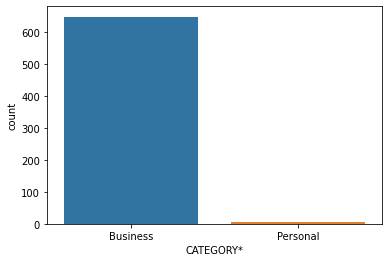

In [ ]:
sns.countplot(x = 'CATEGORY*', data = data)

# How long do people travel

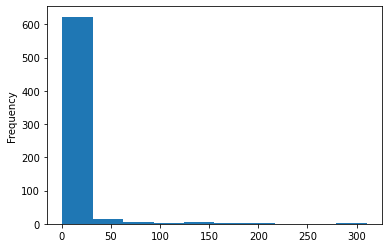

In [ ]:
data['MILES*'].plot.hist()

# Which hour people travel the most ?

Text(0.5, 1.0, 'Number of trips Vs hours')

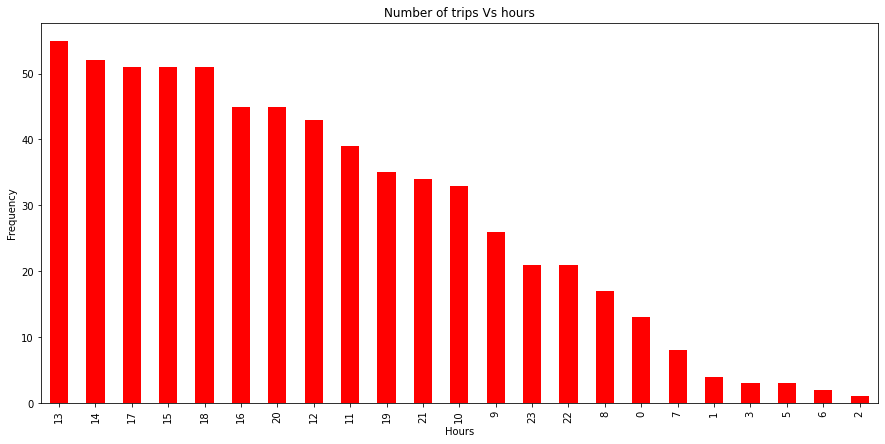

In [ ]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(15,7))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

# Checking the purpose of Visit

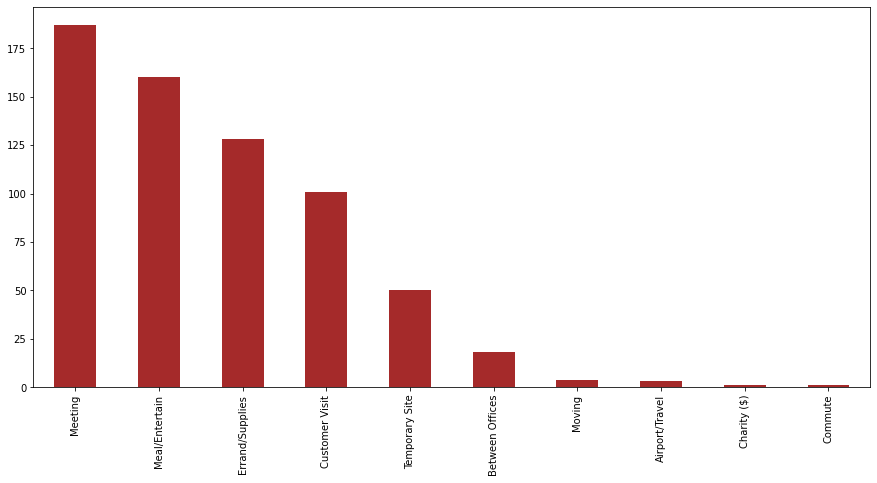

In [ ]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(15,7),color='brown')

# Which day people travel the most?

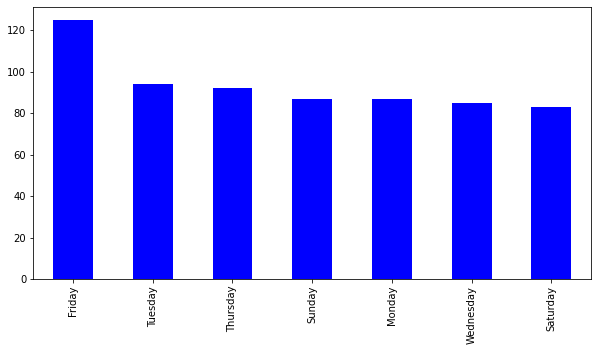

In [ ]:
data['Weekday'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

# Number of trips for each day in a month

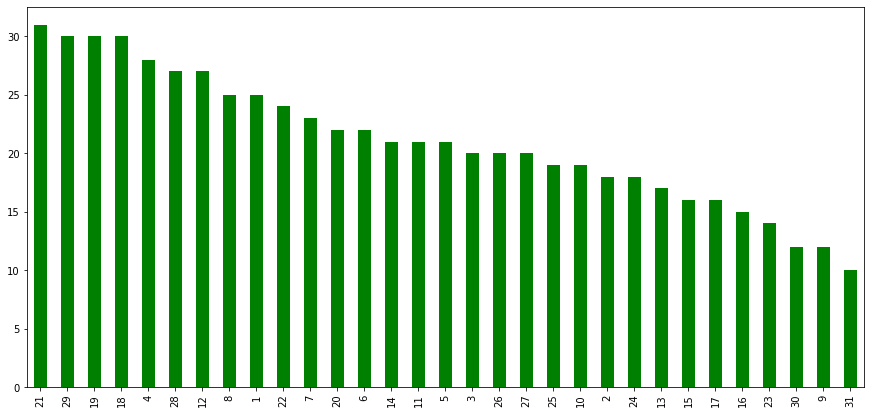

In [ ]:
data['Day'].value_counts().plot(kind='bar',figsize=(15,7),color='green')

# Trips in a month

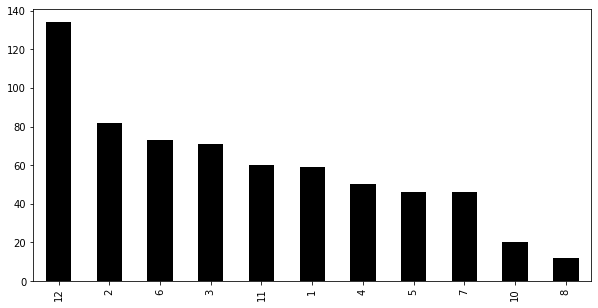

In [ ]:
data['Month'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

# What is the most usual Boarding point

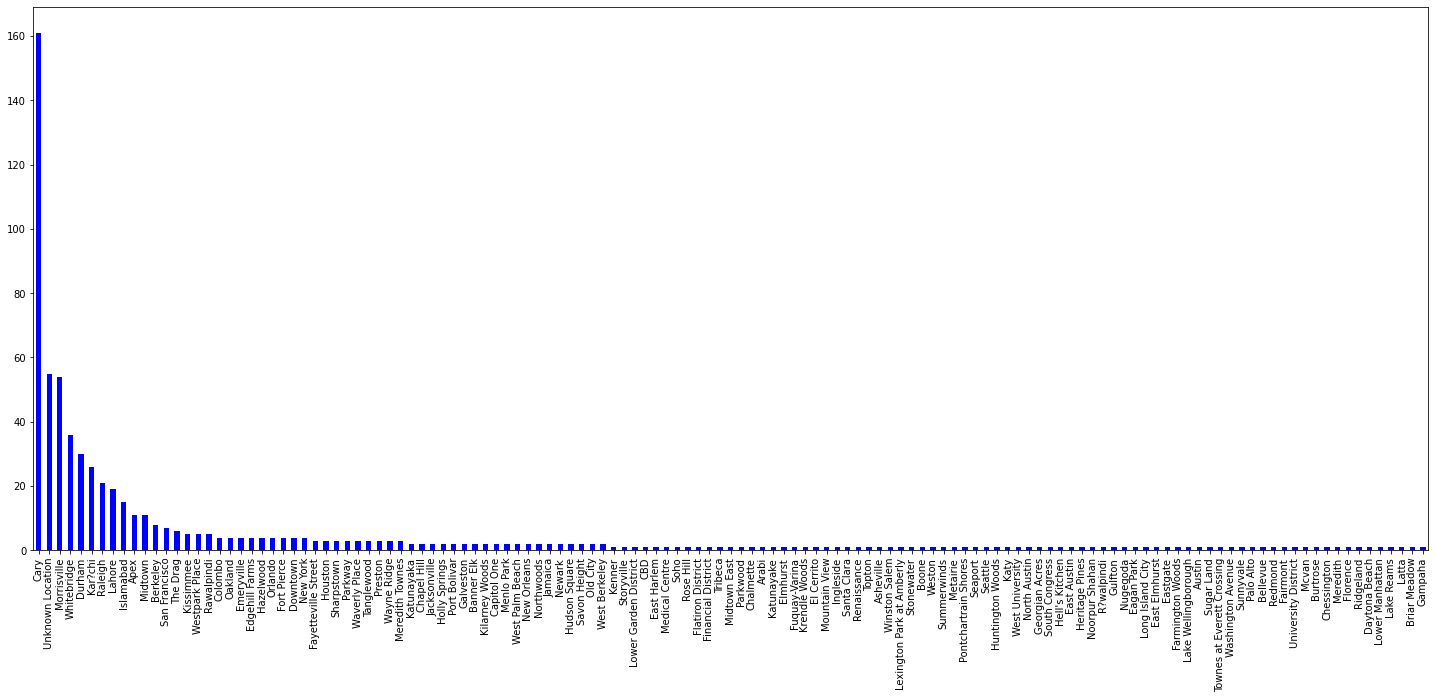

In [ ]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

# Comparing all the purpose with miles, hour, day of the month, day of the week, month, Travelling time.

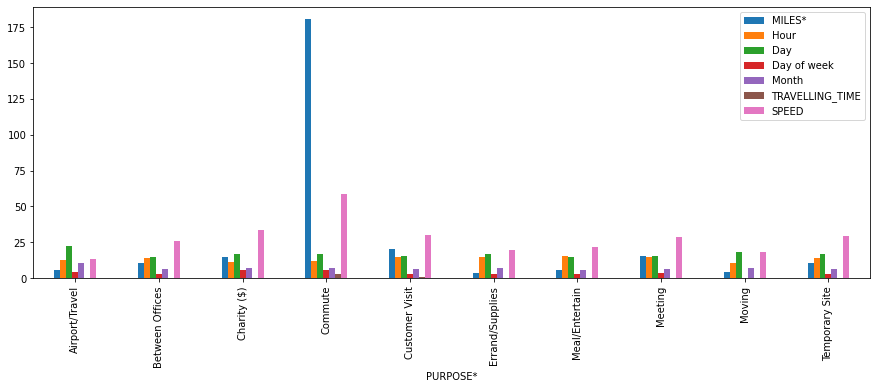

In [ ]:
data.groupby('PURPOSE*').mean().plot(kind='bar', figsize=(15,5))

# How Uber uses this Output ?



*   To create the most efficient market and maximize the number of rides it can provide –Uber uses surge pricing.  You are running late and stressed enough to take the public transport, Uber could come to your rescue, and however you soon notice that they will charge you 1.5 times more than the usual rate.
*   Timing is everything at Uber. Given a pickup location, drop off location and time of the day, predictive models developed at Uber predict how long will it take for a driver to cover the distance. Uber has sophisticated routing and matching algorithms that direct cars to people and people to places. Right from the time you open the uber app till you reach your destination, Uber’s routing engine and matching algorithms are hard at work.
*   Uber uses a mixture of internal and external data to estimate fares. Uber calculates fares automatically using street traffic data, GPS data and its own algorithms that make alterations based on the time of the journey. It also analyses external data like public transport routes to plan various services.